In [1]:
using PlotlyJS
using Test
include("../ode_solver.jl")
include("../numerical_continuation.jl")
include("../numerical_shooting.jl")
include("../examples/example_functions.jl")
include("../visualisation.jl")
include("../finite_difference.jl")

finite_difference (generic function with 1 method)

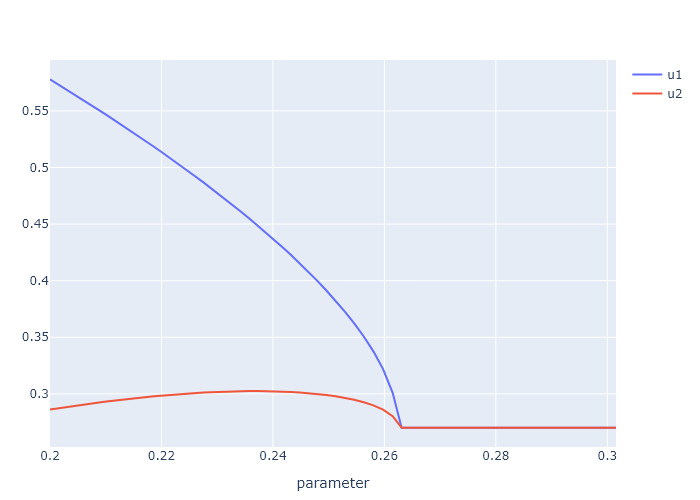

In [70]:
# Create trace
u1 = scatter(
    x = new_par_values,
    y = conditions[:,1],
    mode="lines",
    name="u1",
    showlegend=true
    )
u2 = scatter(
    x = new_par_values,
    y = conditions[:,2],
    mode="lines",
    name="u2",
    showlegend=true
    )

layout = Layout(
    xaxis_title = "parameter",
    # yaxis_type="log",
    yaxis_exponentformat="power",
    # yaxis_title = "",
    width=700, height=350,
    )

plot([u1, u2], layout)

In [139]:
fe_x, fe_uj = finite_difference(u_I, kappa, L, i, mx, mt, method="fe")
fe_z = hcat(fe_z, fe_uj)
be_x, be_uj = finite_difference(u_I, kappa, L, i, mx, mt, method="be")
be_z = hcat(be_z, be_uj)
cn_x, cn_uj = finite_difference(u_I, kappa, L, i, mx, mt, method="cn")
cn_z = hcat(cn_z, cn_uj)

1.0e-5:0.010100909090909091:1.0

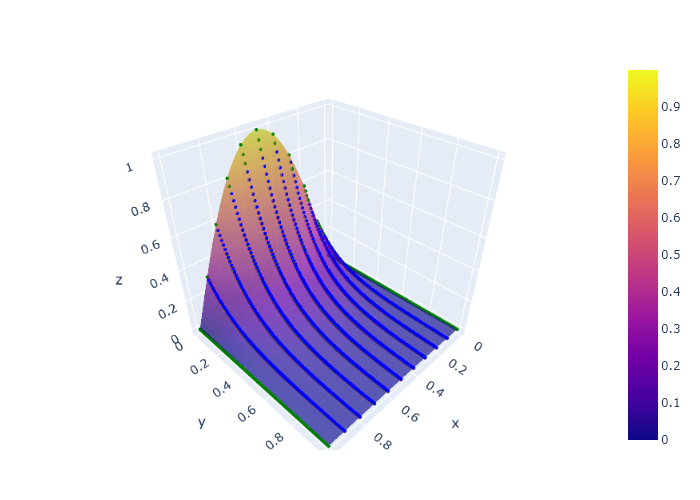

In [28]:
kappa,L,T,mx,mt = 0.5, 1, 1, 10,100

x = range(0, stop=L, length=mx+1)
t = range(0, stop=T, length=mt)

u_est = ones(mt)' .* x
v_est = t' .* ones(mx+1)

fe_z = Matrix{Float64}(undef, mx+1, 0)
be_z = Matrix{Float64}(undef, mx+1, 0)
cn_z = Matrix{Float64}(undef, mx+1, 0)
for i in 0.00001.+t
    fe_x, fe_uj = finite_difference(u_I, kappa, L, i, mx, mt, method="fe")
    fe_z = hcat(fe_z, fe_uj)
    be_x, be_uj = finite_difference(u_I, kappa, L, i, mx, mt, method="be")
    be_z = hcat(be_z, be_uj)
    cn_x, cn_uj = finite_difference(u_I, kappa, L, i, mx, mt, method="cn")
    cn_z = hcat(cn_z, cn_uj)
end



fe_estimate = scatter(x=vec(u_est), y=vec(v_est), z=vec(fe_z),
        mode="markers",type="scatter3d",marker=attr(color="red",size=2))
be_estimate = scatter(x=vec(u_est), y=vec(v_est), z=vec(be_z),
        mode="markers",type="scatter3d",marker=attr(color="blue",size=2))
cn_estimate = scatter(x=vec(u_est), y=vec(v_est), z=vec(cn_z),
        mode="markers",type="scatter3d",marker=attr(color="green",size=2))

# Exact surface
x = range(0, stop=L, length=100)
t = range(0, stop=T, length=100)
u = ones(100)' .* x
v = t' .* ones(100)
z = u_exact(u, v)
exact = surface(
    x=u, 
    y=v, 
    z=z,
    opacity=0.7
    )

# PLot
layout = Layout(
        showlegend=false,
        xaxis_title = "x",
        yaxis_title = "t",
        zaxis_title = "z"
    )
plot([exact,fe_estimate,be_estimate,cn_estimate], layout)